It reads vehicle miles traveled data from a CSV file and fixes a year typo (2103 to 2013)
Creates multiple visualizations including line plots of monthly patterns, yearly trends, and a heatmap showing vehicle miles traveled over time
Calculates and displays summary statistics of the vehicle miles data to understand the numerical patterns in the data

In [ ]:
import pandas as pd

def simple_profile_csv(file_path):
    df = pd.read_csv(file_path)

    total_rows = len(df)
    total_columns = df.shape[1]
    column_names = df.columns.tolist()

    print(df.head())

    print(f"Total Rows: {total_rows}")
    print(f"Total Columns: {total_columns}")

    print("\nColumn Names:")
    print(column_names)

    print("\nDataFrame Info:")
    print(df.info())

    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))

    print("\nMissing Values per Column:")
    print(df.isnull().sum())

file_path = '/content/Vehicle_miles.csv'
simple_profile_csv(file_path)


  Unnamed: 0  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct    Nov    Dec
0       2010  223  213  254  257  259  263  269  268  248  260  243.0  244.0
1       2011  221  212  249  248  253  257  259  259  241  251  237.0  244.0
2       2012  226  218  253  248  260  259  259  264  238  253  240.0  238.0
3       2013  227  215  249  251  262  258  264  267  242  259  239.0  240.0
4       2014  226  215  252  258  268  265  272  271  249  267  243.0  254.0
Total Rows: 15
Total Columns: 13

Column Names:
['Unnamed: 0', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15 non-null     object 
 1   Jan         15 non-null     int64  
 2   Feb         15 non-null     int64  
 3   Mar         15 non-null     int64  
 4   Apr         15 non-n

In [ ]:
import pandas as pd

def vehicle_data_profiling(file_path):
    print("Loading data...")
    df = pd.read_csv(file_path)

    print("\nCreating summary table...")
    summary = []

    for col in df.columns:
        col_data = df[col]
        col_type = col_data.dtype
        missing_values = col_data.isnull().sum()
        unique_values = col_data.nunique()
        most_frequent = col_data.mode().iloc[0] if not col_data.mode().empty else None

        if pd.api.types.is_numeric_dtype(col_data):
            col_stats = {
                'Mean': col_data.mean(),
                'Median': col_data.median(),
                'Min': col_data.min(),
                'Max': col_data.max(),
                'Std Dev': col_data.std()
            }
        else:
            col_stats = {
                'Mean': None,
                'Median': None,
                'Min': None,
                'Max': None,
                'Std Dev': None
            }

        summary.append({
            'Column': col,
            'Data Type': col_type,
            'Missing Values': missing_values,
            'Unique Values': unique_values,
            'Most Frequent': most_frequent,
            **col_stats
        })

    summary_df = pd.DataFrame(summary)
    print("\nSummary Table:")
    print(summary_df)

    summary_df.to_csv('/content/vehicle_data_summary.csv', index=False)
    print("\nSummary table saved to '/content/vehicle_data_summary.csv'.")

file_path = "/content/Fuel_prices.csv"

vehicle_data_profiling(file_path)


Loading data...

Creating summary table...

Summary Table:
        Column Data Type  Missing Values  Unique Values Most Frequent  Mean  \
0  Report Date    object               0             88        1/1/06  None   
1     Gasoline    object               0             74         $2.22  None   
2          E85    object               0             77         $2.65  None   
3          CNG    object               0             56         $2.09  None   
4          LNG    object              55             28         $2.40  None   
5      Propane    object               0             68         $1.62  None   
6       Diesel    object               0             73         $2.71  None   
7          B20    object               3             71         $2.11  None   
8     B99/B100    object              14             63         $3.65  None   

  Median   Min   Max Std Dev  
0   None  None  None    None  
1   None  None  None    None  
2   None  None  None    None  
3   None  None  None    No

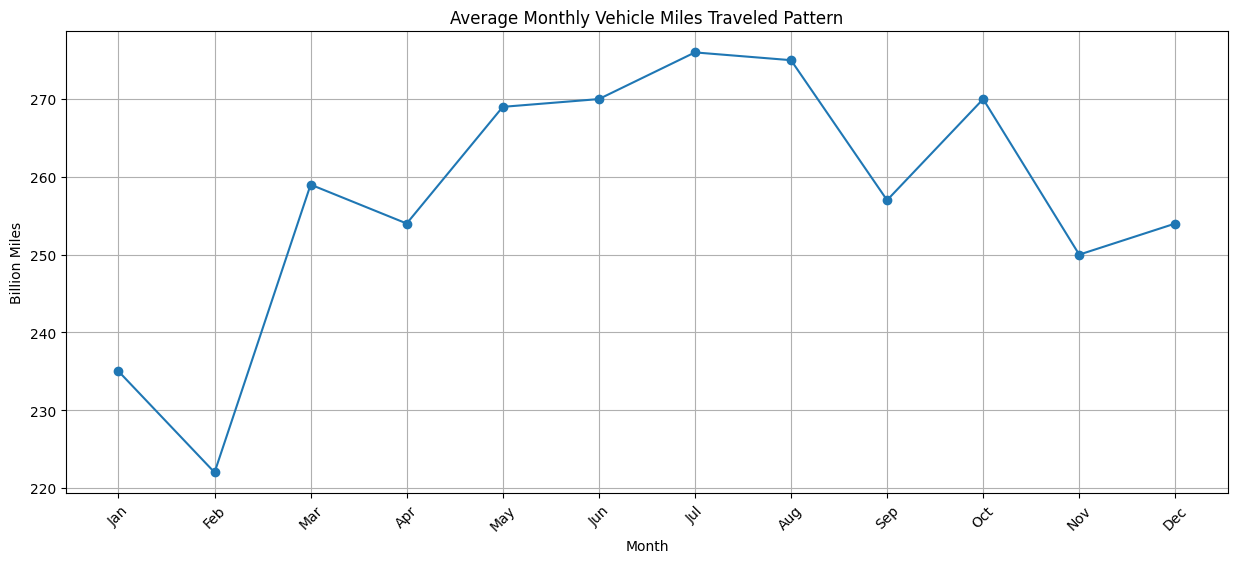

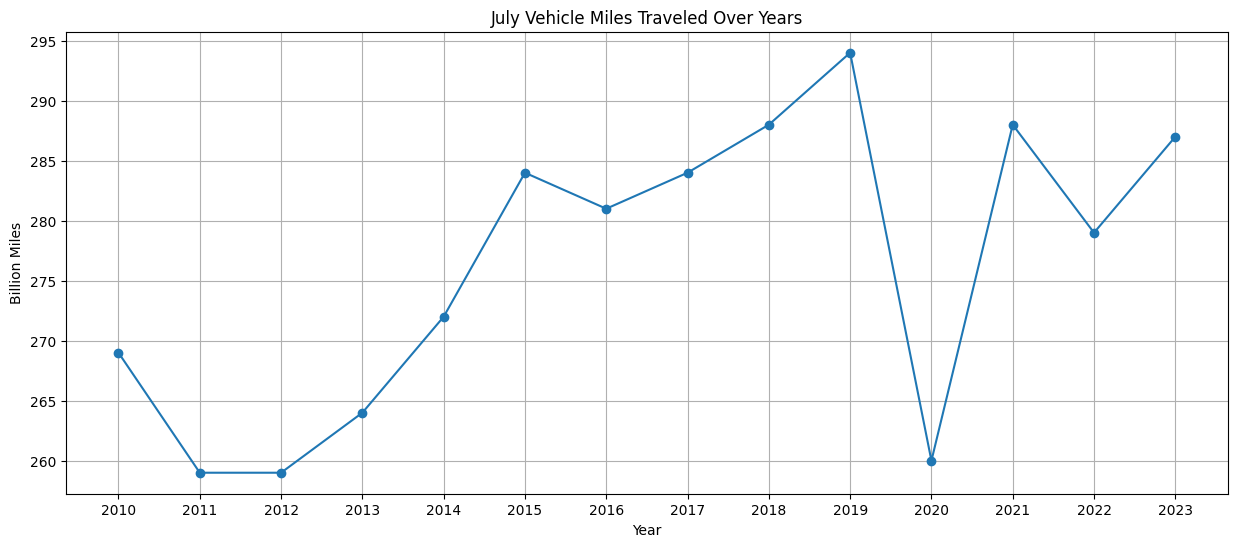


Monthly Vehicle Miles Summary Statistics:
              Jan         Feb         Mar         Apr         May         Jun  \
count   15.000000   15.000000   15.000000   15.000000   15.000000   15.000000   
mean   235.200000  222.333333  258.733333  253.666667  268.733333  270.066667   
std     10.359261    8.731443   13.418892   26.097801   18.755824   11.157743   
min    221.000000  207.000000  221.000000  166.000000  213.000000  247.000000   
25%    226.000000  215.000000  252.500000  251.500000  261.000000  261.000000   
50%    235.000000  222.000000  261.000000  256.000000  275.000000  275.000000   
75%    244.000000  229.000000  269.500000  267.500000  280.500000  279.500000   
max    252.000000  234.000000  272.000000  279.000000  287.000000  283.000000   

              Jul         Aug         Sep         Oct         Nov         Dec  
count   15.000000   15.000000   15.000000   15.000000   14.000000   14.000000  
mean   276.266667  274.733333  257.000000  269.600000  249.642857  

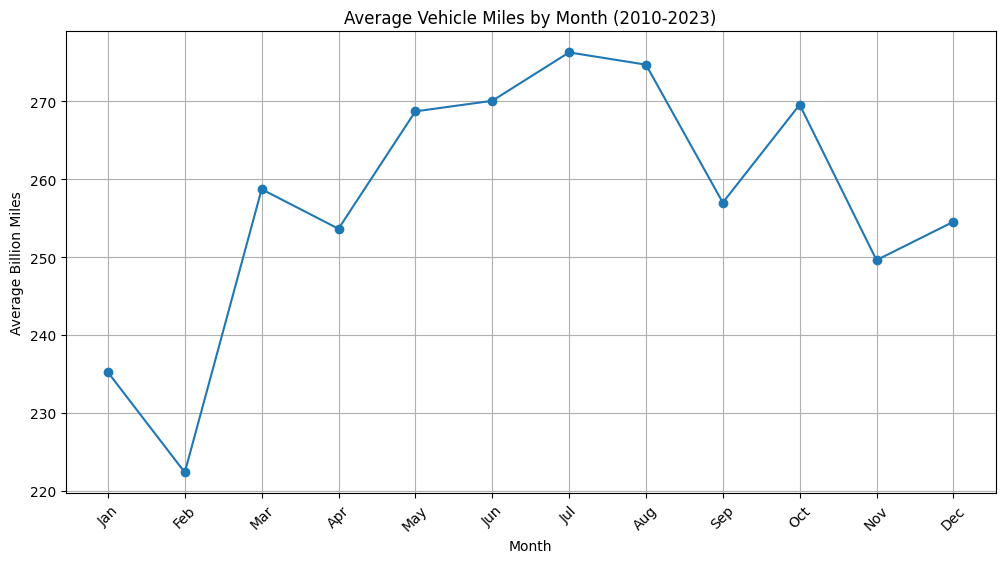

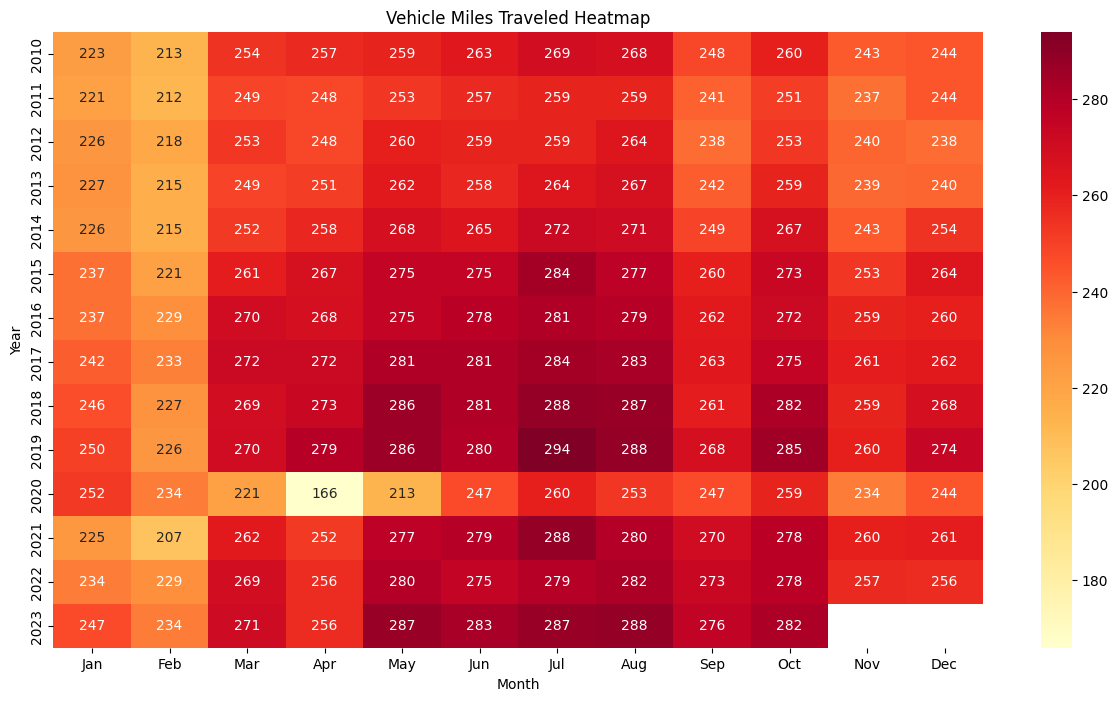

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_vehicle_miles():
    df = pd.read_csv('/content/Vehicle_miles.csv', index_col=0)

    df.index = [2013 if x == 2103 else x for x in df.index]

    plt.figure(figsize=(15, 6))
    monthly_avg = df.iloc[-1]
    months = df.columns

    plt.plot(months, monthly_avg, marker='o')
    plt.title('Average Monthly Vehicle Miles Traveled Pattern')
    plt.xlabel('Month')
    plt.ylabel('Billion Miles')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(15, 6))
    years = df.index[:-1]
    july_miles = df['Jul'][:-1]
    plt.plot(years, july_miles, marker='o')
    plt.title('July Vehicle Miles Traveled Over Years')
    plt.xlabel('Year')
    plt.ylabel('Billion Miles')
    plt.grid(True)
    plt.show()

    print("\nMonthly Vehicle Miles Summary Statistics:")
    print(df.describe())

    monthly_means = df.iloc[:-1].mean()
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_means.index, monthly_means.values, marker='o')
    plt.title('Average Vehicle Miles by Month (2010-2023)')
    plt.xlabel('Month')
    plt.ylabel('Average Billion Miles')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(15, 8))
    sns.heatmap(df.iloc[:-1], cmap='YlOrRd', annot=True, fmt='.0f')
    plt.title('Vehicle Miles Traveled Heatmap')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

analyze_vehicle_miles()

<ipython-input-3-750ea33fcaf3>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Report Date'] = pd.to_datetime(df['Report Date'])


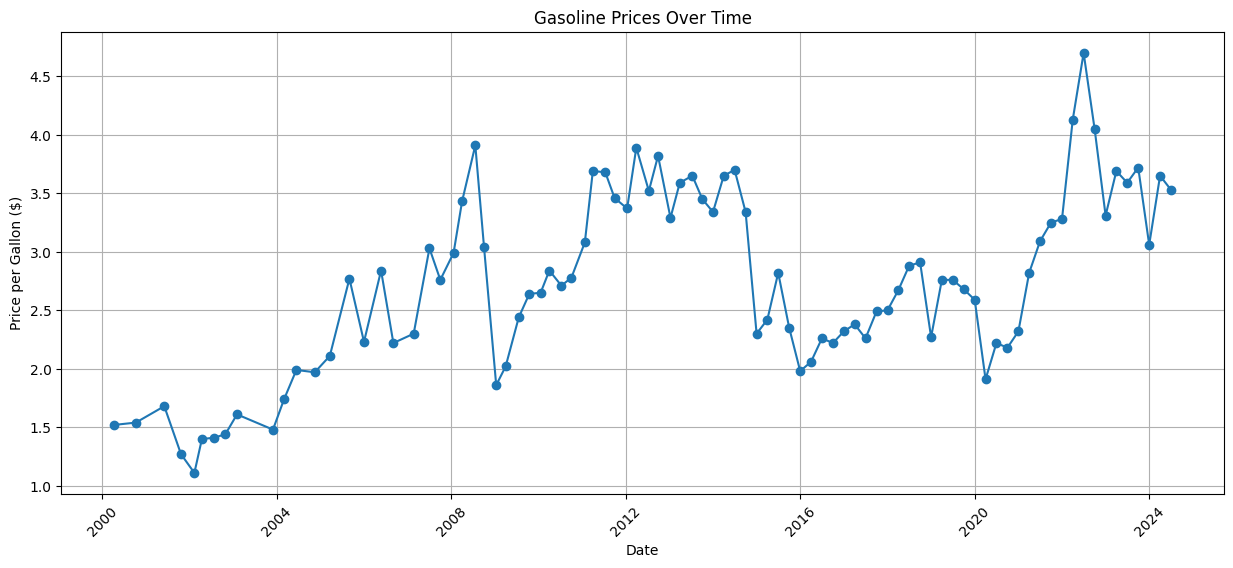

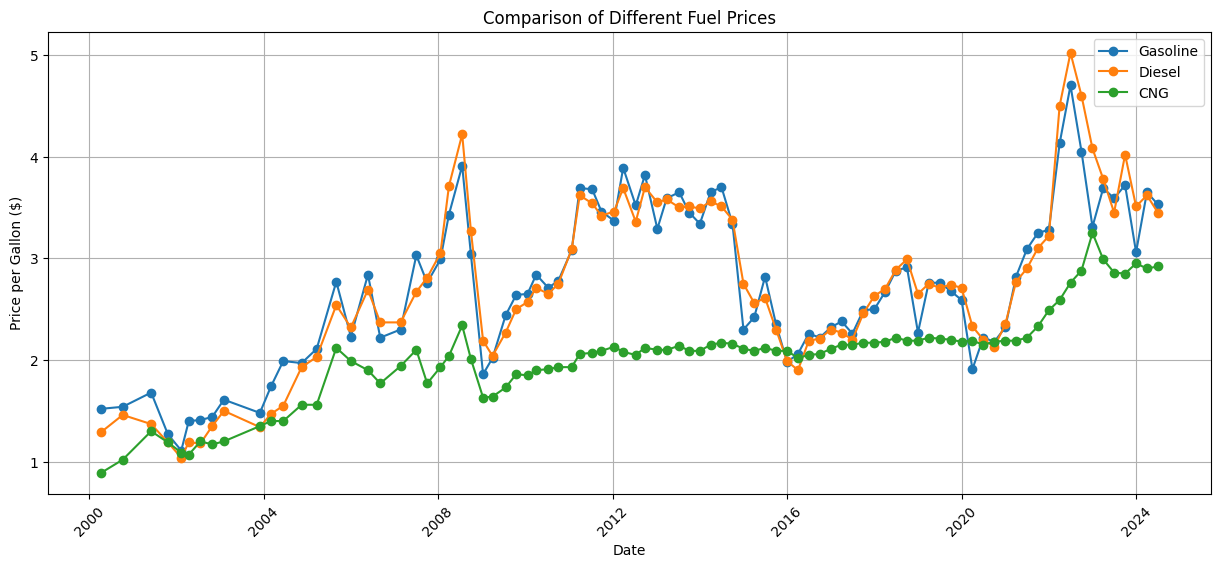


Fuel Price Summary Statistics:
        Gasoline     Diesel        CNG
count  88.000000  88.000000  88.000000
mean    2.734432   2.739659   2.035795
std     0.769741   0.850866   0.462340
min     1.110000   1.040000   0.890000
25%     2.220000   2.207500   1.900000
50%     2.760000   2.705000   2.095000
75%     3.347500   3.452500   2.190000
max     4.700000   5.020000   3.250000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_fuel_prices():
    df = pd.read_csv('/content/Fuel_prices.csv')

    for col in ['Gasoline', 'E85', 'CNG', 'Propane', 'Diesel', 'B20']:
        if col in df.columns:
            df[col] = df[col].str.replace('$', '').astype(float)

    df['Report Date'] = pd.to_datetime(df['Report Date'])

    plt.figure(figsize=(15, 6))
    plt.plot(df['Report Date'], df['Gasoline'], marker='o')
    plt.title('Gasoline Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price per Gallon ($)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(15, 6))
    for fuel in ['Gasoline', 'Diesel', 'CNG']:
        plt.plot(df['Report Date'], df[fuel], label=fuel, marker='o')
    plt.title('Comparison of Different Fuel Prices')
    plt.xlabel('Date')
    plt.ylabel('Price per Gallon ($)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    print("\nFuel Price Summary Statistics:")
    print(df[['Gasoline', 'Diesel', 'CNG']].describe())

analyze_fuel_prices()

<ipython-input-7-af970cbcb86a>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Report Date'] = pd.to_datetime(df['Report Date'])


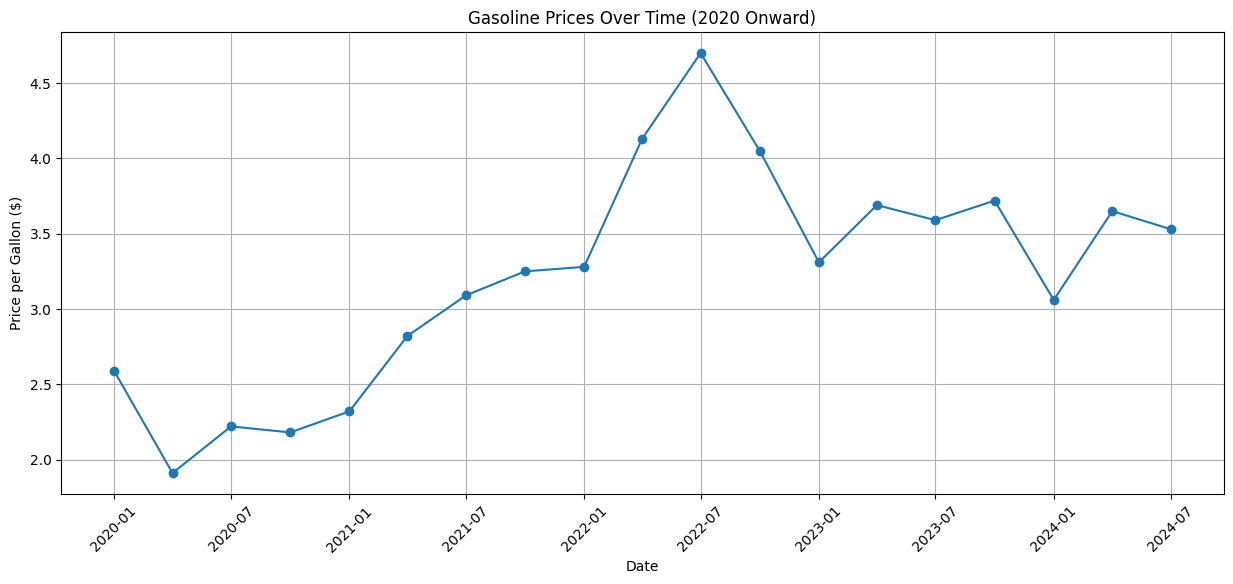

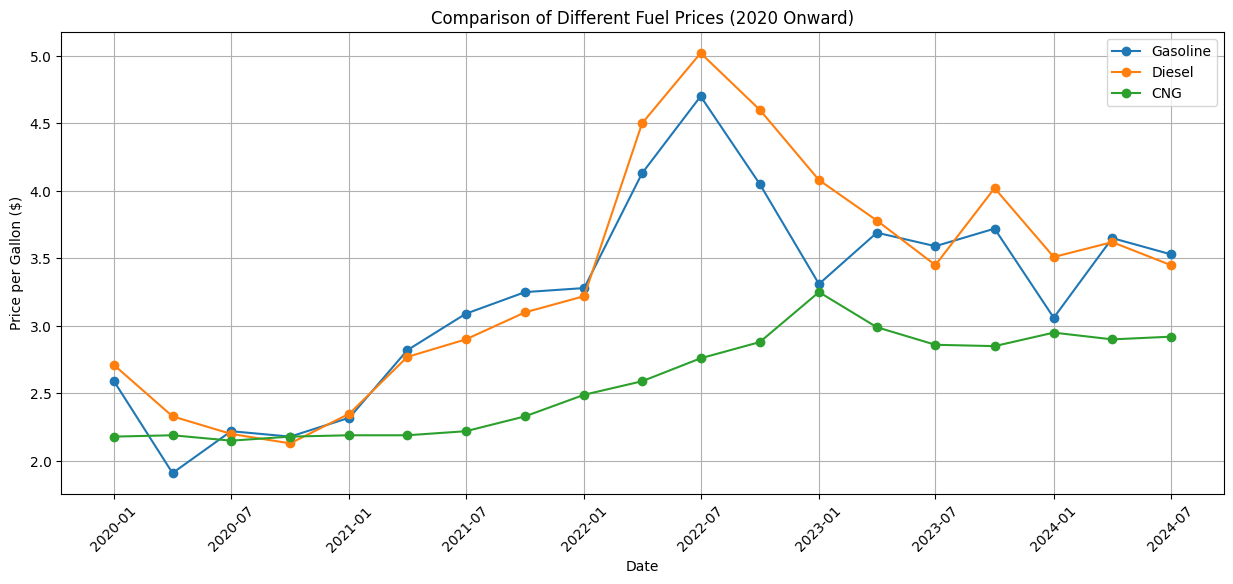


Fuel Price Summary Statistics (2020 Onward):
        Gasoline     Diesel        CNG
count  19.000000  19.000000  19.000000
mean    3.215263   3.354737   2.582632
std     0.738447   0.844521   0.365678
min     1.910000   2.130000   2.150000
25%     2.705000   2.740000   2.190000
50%     3.280000   3.450000   2.590000
75%     3.670000   3.900000   2.890000
max     4.700000   5.020000   3.250000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_fuel_prices():
    df = pd.read_csv('/content/Fuel_prices.csv')

    for col in ['Gasoline', 'E85', 'CNG', 'Propane', 'Diesel', 'B20']:
        if col in df.columns:
            df[col] = df[col].str.replace('$', '').astype(float)

    df['Report Date'] = pd.to_datetime(df['Report Date'])

    df = df[df['Report Date'] >= '2020-01-01']

    plt.figure(figsize=(15, 6))
    plt.plot(df['Report Date'], df['Gasoline'], marker='o')
    plt.title('Gasoline Prices Over Time (2020 Onward)')
    plt.xlabel('Date')
    plt.ylabel('Price per Gallon ($)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(15, 6))
    for fuel in ['Gasoline', 'Diesel', 'CNG']:
        if fuel in df.columns:
            plt.plot(df['Report Date'], df[fuel], label=fuel, marker='o')
    plt.title('Comparison of Different Fuel Prices (2020 Onward)')
    plt.xlabel('Date')
    plt.ylabel('Price per Gallon ($)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    print("\nFuel Price Summary Statistics (2020 Onward):")
    print(df[['Gasoline', 'Diesel', 'CNG']].describe())

analyze_fuel_prices()

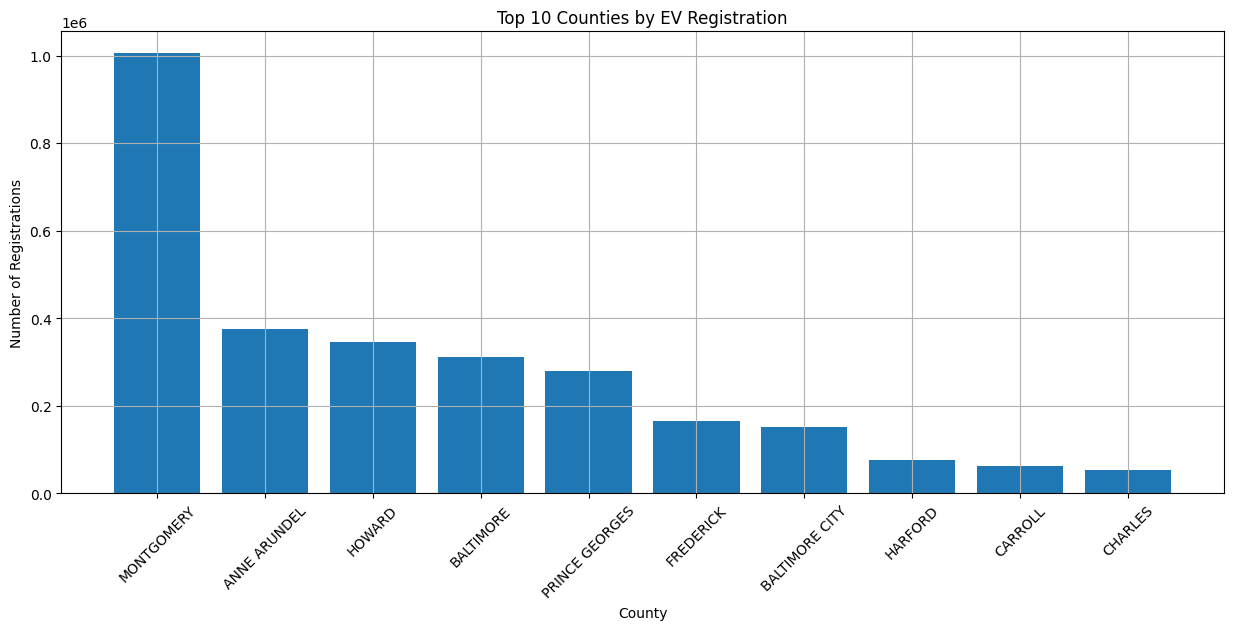

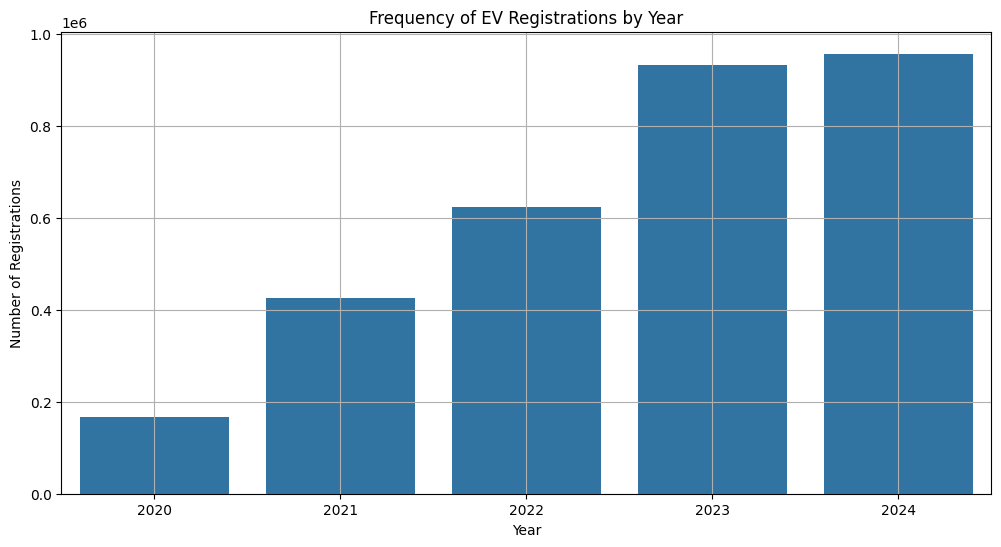


EV Registration Summary Statistics:
count     7200.000000
mean       430.683194
std       1627.597060
min          1.000000
25%          1.000000
50%          5.000000
75%        118.000000
max      26540.000000
Name: Count, dtype: float64

Total EV Registrations: 3,100,919


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_ev_registrations():
    df = pd.read_csv('ev_registration.csv')

    df['Count'] = df['Count'].astype(str).str.replace(',', '').astype(int)

    if 'Year_Month' in df.columns:
        df['Year'] = pd.to_datetime(df['Year_Month'], format='%Y/%m').dt.year

    plt.figure(figsize=(15, 6))
    top_counties = df.groupby('County')['Count'].sum().sort_values(ascending=False).head(10)

    plt.bar(range(len(top_counties)), top_counties.values)
    plt.title('Top 10 Counties by EV Registration')
    plt.xlabel('County')
    plt.ylabel('Number of Registrations')
    plt.xticks(range(len(top_counties)), top_counties.index, rotation=45)
    plt.grid(True)
    plt.show()

    if 'Year' in df.columns:
        plt.figure(figsize=(12, 6))
        year_counts = df.groupby('Year')['Count'].sum().reset_index()
        sns.barplot(data=year_counts, x='Year', y='Count')
        plt.title('Frequency of EV Registrations by Year')
        plt.xlabel('Year')
        plt.ylabel('Number of Registrations')
        plt.grid(True)
        plt.show()
    else:
        print("Year column not found. Cannot show frequency by year.")

    print("\nEV Registration Summary Statistics:")
    print(df['Count'].describe())

    total_reg = df['Count'].sum()
    print(f"\nTotal EV Registrations: {int(total_reg):,}")

analyze_ev_registrations()


<ipython-input-1-cda3048aac03>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_ev['Year_Month'] = pd.to_datetime(monthly_ev['Year_Month'])


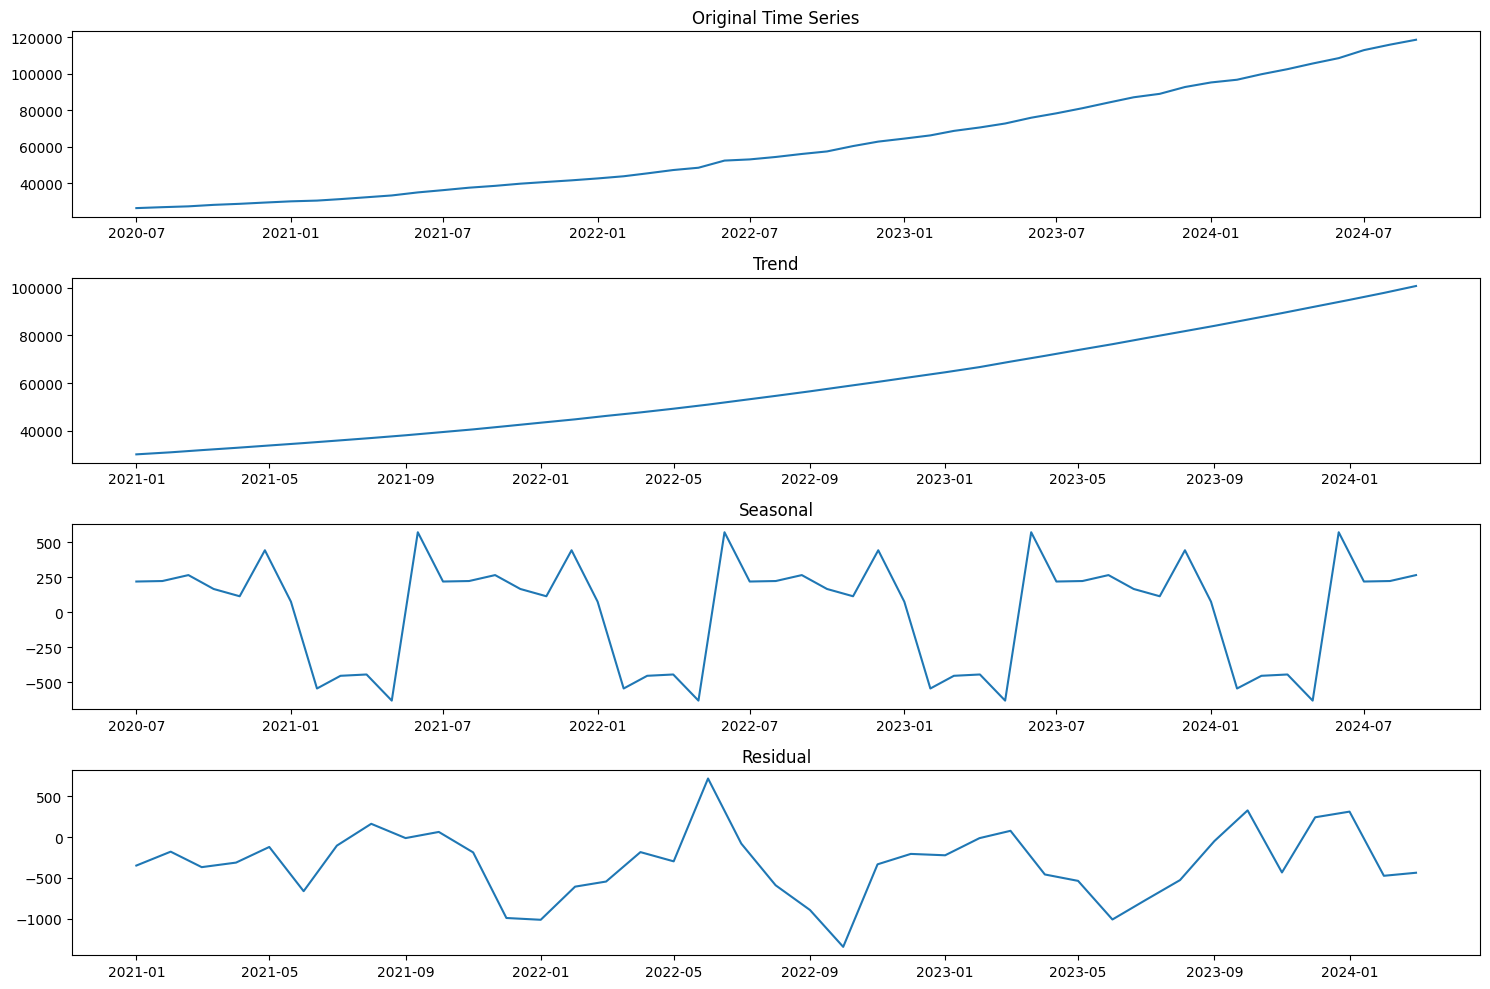


Augmented Dickey-Fuller Test:
ADF Statistic: 9.109480264705978
p-value: 1.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
<ipython-input-1-cda3048aac03>:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plo

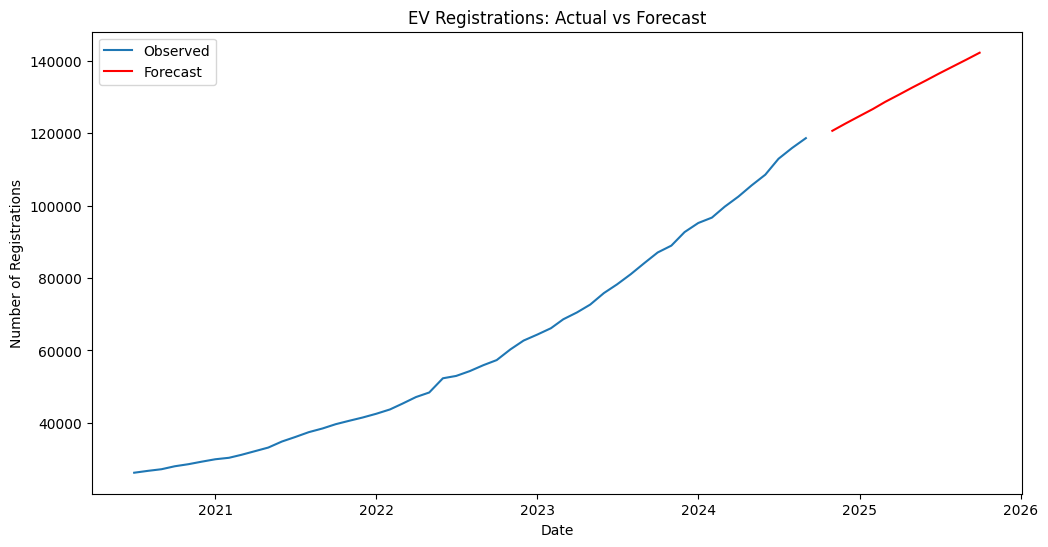


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                   51
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -417.324
Date:                Fri, 20 Dec 2024   AIC                            840.647
Time:                        21:24:34   BIC                            846.383
Sample:                    07-01-2020   HQIC                           842.831
                         - 09-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9942      0.015     66.090      0.000       0.965       1.024
ma.L1         -0.9545      0.061    -15.738      0.000      -1.073      -0.836
sigma2      9.174e+05    8.7e-

In [ ]:
 ### Order 1,1,1
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def time_series_analysis():
    df = pd.read_csv('ev_registration.csv')
    df['Count'] = df['Count'].astype(str).str.replace(',', '').astype(int)

    monthly_ev = df.groupby('Year_Month')['Count'].sum().reset_index()
    monthly_ev['Year_Month'] = pd.to_datetime(monthly_ev['Year_Month'])
    monthly_ev.set_index('Year_Month', inplace=True)

    decomposition = seasonal_decompose(monthly_ev['Count'], period=12)

    plt.figure(figsize=(15, 10))
    plt.subplot(411)
    plt.plot(monthly_ev.index, monthly_ev['Count'])
    plt.title('Original Time Series')
    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.title('Trend')
    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal')
    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.title('Residual')
    plt.tight_layout()
    plt.show()

    result = adfuller(monthly_ev['Count'].dropna())
    print('\nAugmented Dickey-Fuller Test:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    # 3. ARIMA Model
    model = ARIMA(monthly_ev['Count'], order=(1,1,1))
    results = model.fit()

    forecast = results.forecast(steps=12)

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_ev.index, monthly_ev['Count'], label='Observed')
    plt.plot(pd.date_range(start=monthly_ev.index[-1], periods=13, freq='M')[1:],
             forecast, label='Forecast', color='red')
    plt.title('EV Registrations: Actual vs Forecast')
    plt.xlabel('Date')
    plt.ylabel('Number of Registrations')
    plt.legend()
    plt.show()

    print('\nARIMA Model Summary:')
    print(results.summary())

time_series_analysis()

<ipython-input-3-60ba07f1ddbd>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_ev['Year_Month'] = pd.to_datetime(monthly_ev['Year_Month'])


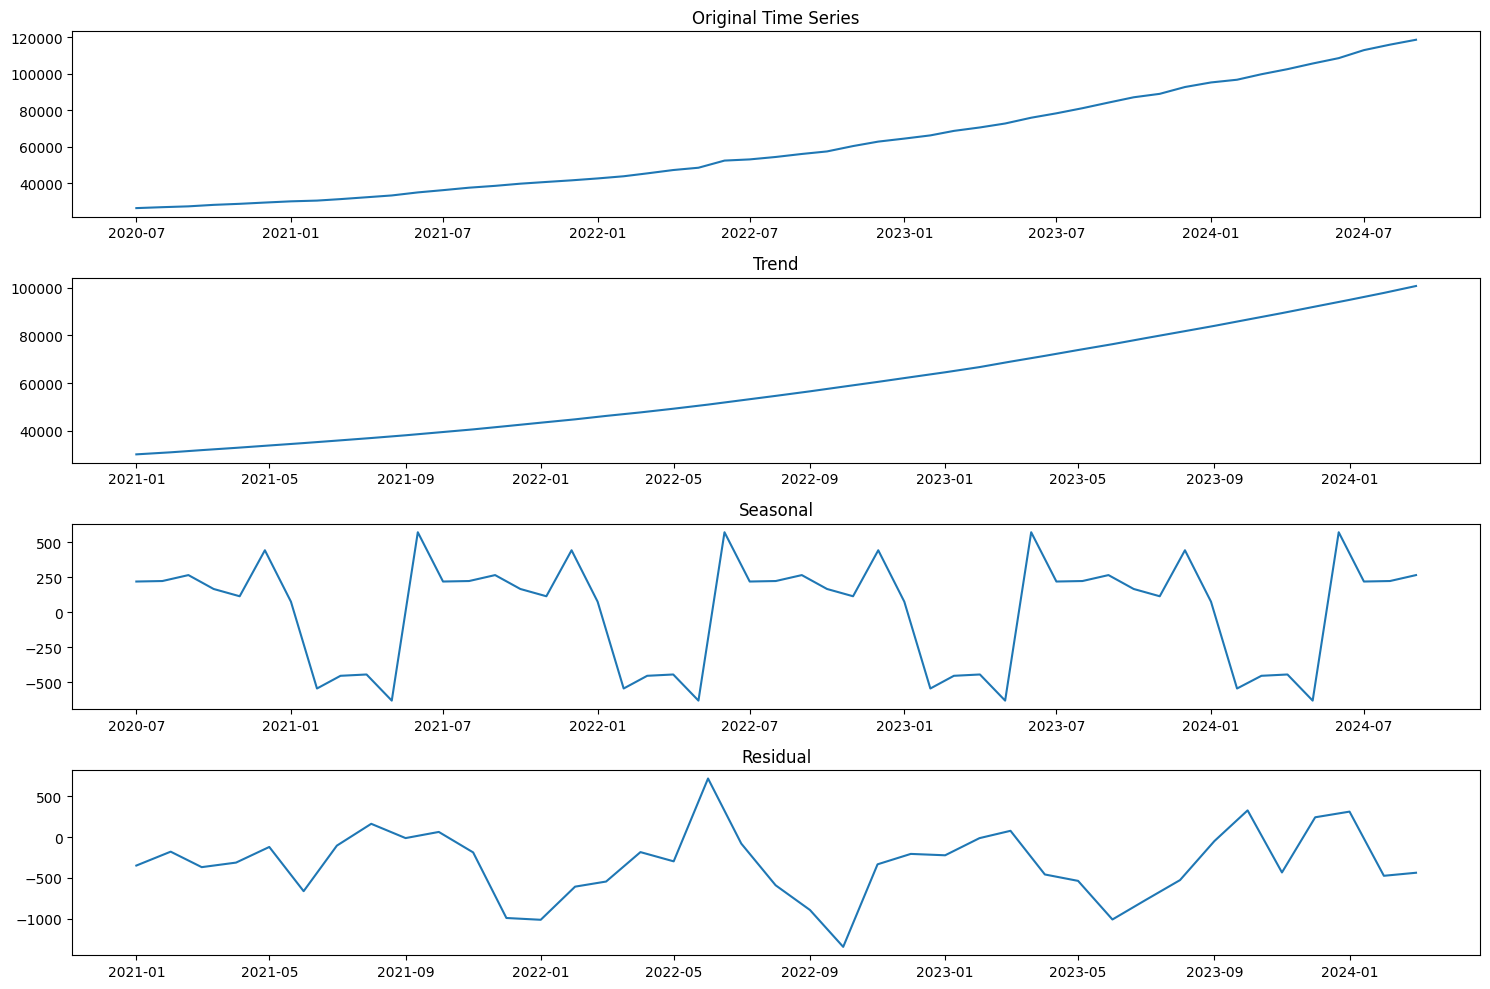


Augmented Dickey-Fuller Test:
ADF Statistic: 9.109480264705978
p-value: 1.0

Determining optimal ARIMA parameters using auto_arima...
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=810.226, Time=0.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=807.725, Time=0.16 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=806.320, Time=0.61 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=808.344, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=806.979, Time=1.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=807.283, Time=0.53 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=804.343, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0]             : AIC=805.009, Time=0.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0]             : AIC=804.717, Time=0.80 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=805.766, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 7.025 seconds

Best ARIMA Order: (0, 2, 1)


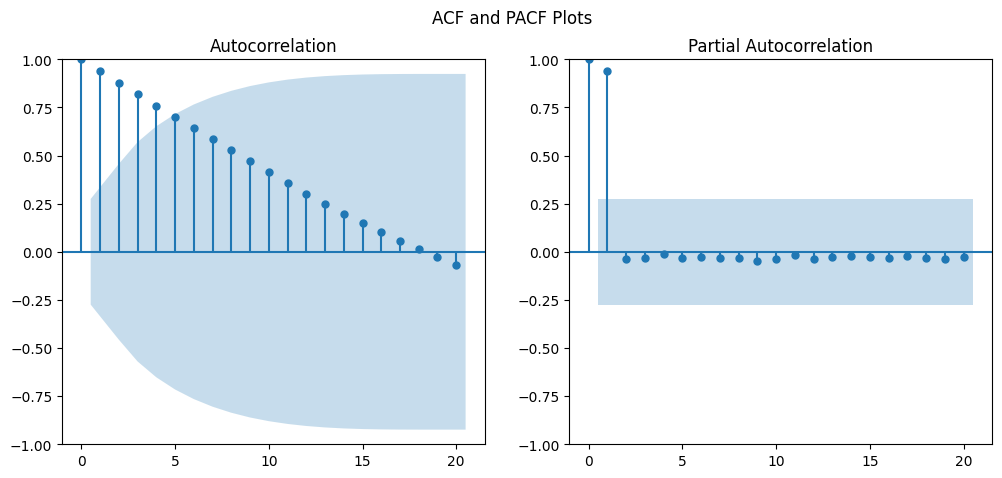

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-3-60ba07f1ddbd>:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=monthly_ev.index[-1], periods=13, freq='M')[1:],


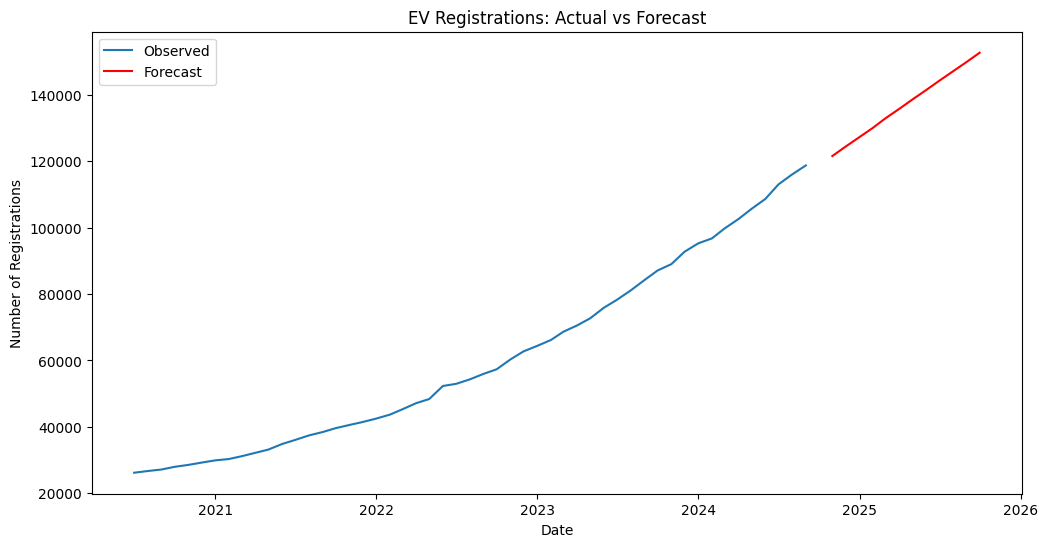


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                   51
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -400.171
Date:                Fri, 20 Dec 2024   AIC                            804.343
Time:                        21:25:47   BIC                            808.126
Sample:                    07-01-2020   HQIC                           805.778
                         - 09-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2369      0.045     -5.229      0.000      -0.326      -0.148
sigma2      6.445e+05   9.14e+04      7.054      0.000    4.65e+05    8.24e+05
Ljung-Box (L1) (Q):           

In [ ]:
# ! pip install pmdarima
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def time_series_analysis():
    df = pd.read_csv('ev_registration.csv')
    df['Count'] = df['Count'].astype(str).str.replace(',', '').astype(int)

    monthly_ev = df.groupby('Year_Month')['Count'].sum().reset_index()
    monthly_ev['Year_Month'] = pd.to_datetime(monthly_ev['Year_Month'])
    monthly_ev.set_index('Year_Month', inplace=True)

    decomposition = seasonal_decompose(monthly_ev['Count'], period=12)

    plt.figure(figsize=(15, 10))
    plt.subplot(411)
    plt.plot(monthly_ev.index, monthly_ev['Count'])
    plt.title('Original Time Series')
    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.title('Trend')
    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal')
    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.title('Residual')
    plt.tight_layout()
    plt.show()

    result = adfuller(monthly_ev['Count'].dropna())
    print('\nAugmented Dickey-Fuller Test:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    print("\nDetermining optimal ARIMA parameters using auto_arima...")
    stepwise_model = auto_arima(monthly_ev['Count'],
                                seasonal=False,
                                trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)

    print(f"\nBest ARIMA Order: {stepwise_model.order}")

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    plot_acf(monthly_ev, lags=20, ax=ax[0])
    plot_pacf(monthly_ev, lags=20, ax=ax[1])
    plt.suptitle("ACF and PACF Plots")
    plt.show()

    model = ARIMA(monthly_ev['Count'], order=stepwise_model.order)
    results = model.fit()

    forecast = results.forecast(steps=12)

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_ev.index, monthly_ev['Count'], label='Observed')
    plt.plot(pd.date_range(start=monthly_ev.index[-1], periods=13, freq='M')[1:],
             forecast, label='Forecast', color='red')
    plt.title('EV Registrations: Actual vs Forecast')
    plt.xlabel('Date')
    plt.ylabel('Number of Registrations')
    plt.legend()
    plt.show()

    print('\nARIMA Model Summary:')
    print(results.summary())

time_series_analysis()


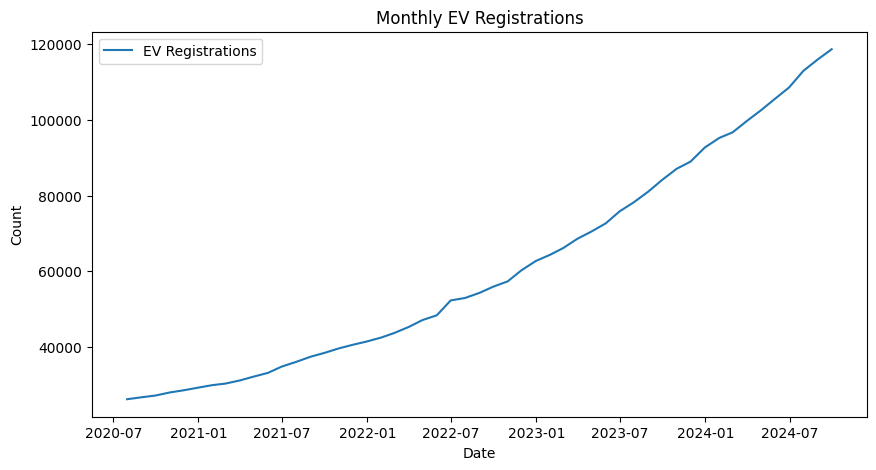


### Augmented Dickey-Fuller Test ###
ADF Statistic: 9.1095
p-value: 1.0000
The data is not stationary. Differencing may be required.


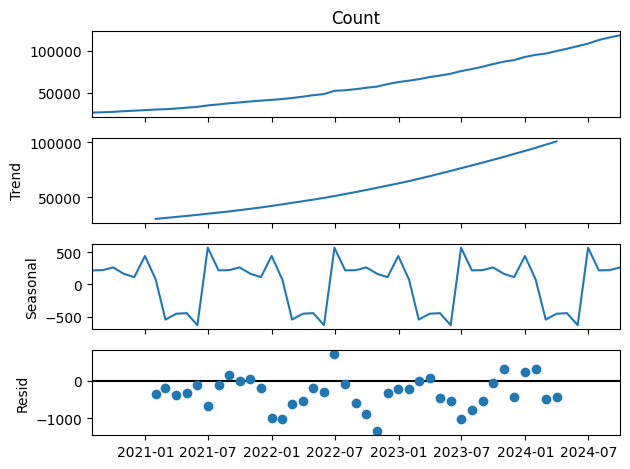


### Running Auto ARIMA ###
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=810.226, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(1,0,0)[12]             : AIC=809.588, Time=0.22 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,1)[12]             : AIC=808.045, Time=0.31 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=806.320, Time=0.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(1,0,0)[12]             : AIC=808.316, Time=0.24 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(1,0,1)[12]             : AIC=809.106, Time=0.71 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[12]             : AIC=806.979, Time=0.51 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[12]             : AIC=807.283, Time=0.34 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=807.725, Time=0.17 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[12]             : AIC=inf, Time=1.23 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[12] intercept   : AIC=806.320, Time=0.32 sec

Best model:  ARIMA(0,2,1)(0,0,0)[12]          
Total fit time: 5.197 seconds

Best SARIMA Order: (0, 2, 1)
Best Seasonal Order: (0, 0, 0, 12)

### Fitting SARIMA Model ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                   51
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -400.171
Date:                Fri, 20 Dec 2024   AIC                            804.343
Time:                        21:26:15   BIC                            808.126
Sample:                    07-31-2020   HQIC                           805.778
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2369      0.045     -5.229      0.000      -0.326      -0.148
sigma2      6.445e+05   9.14e+04      7.054      0.000    4.65e+05    8.24e+05
Ljung-Box (L1) (Q):                   7.92   Jarque-

<ipython-input-4-e2462fe5aea5>:62: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_ev.index[-1], periods=13, freq='M')[1:]


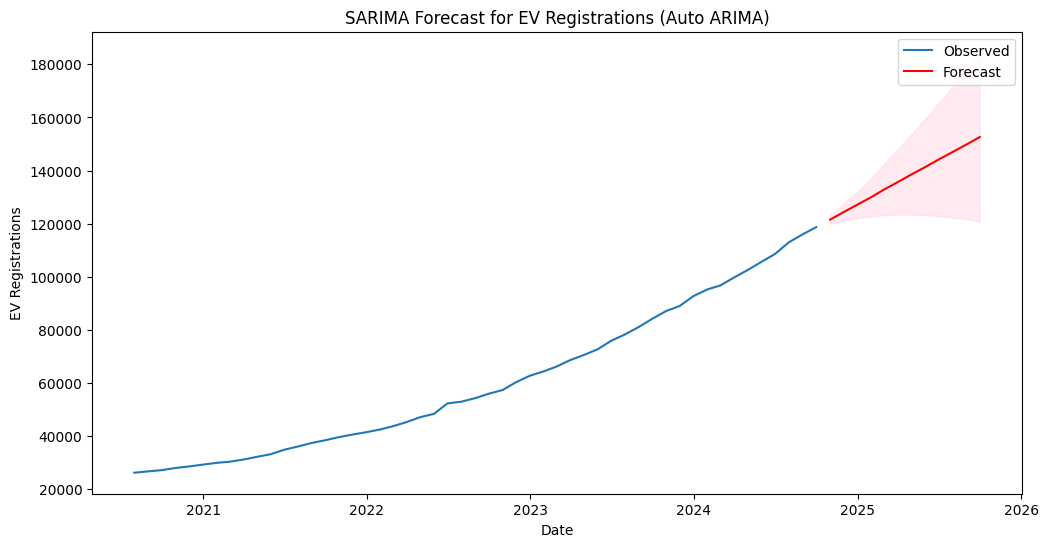

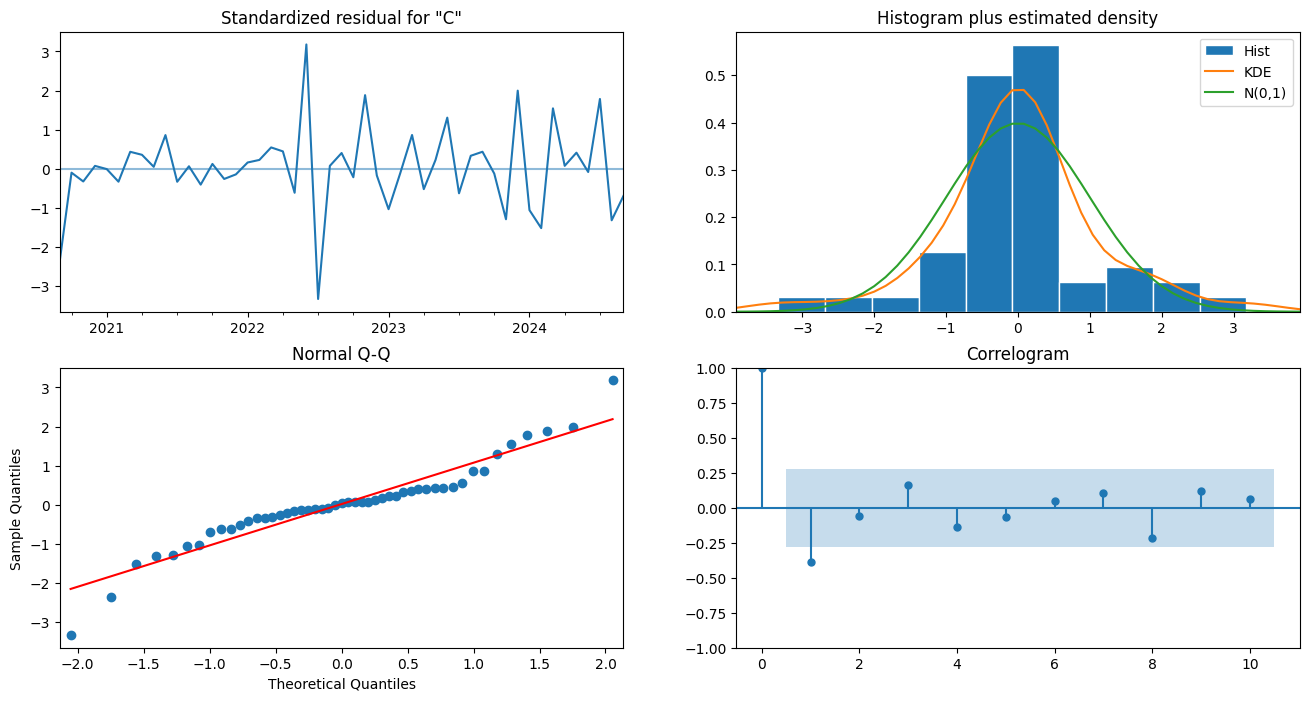

In [ ]:
!pip install  pmdarima
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

def sarima_with_auto_arima():
    ev_file = 'ev_registration.csv'
    ev_df = pd.read_csv(ev_file)
    ev_df['Year_Month'] = pd.to_datetime(ev_df['Year_Month'], format='%Y/%m', errors='coerce')
    ev_df['Count'] = ev_df['Count'].astype(str).str.replace(',', '').astype(int)

    monthly_ev = ev_df.groupby('Year_Month')['Count'].sum()
    monthly_ev.index = monthly_ev.index + pd.offsets.MonthEnd(0)

    plt.figure(figsize=(10, 5))
    plt.plot(monthly_ev, label='EV Registrations')
    plt.title('Monthly EV Registrations')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

    print("\n### Augmented Dickey-Fuller Test ###")
    result = adfuller(monthly_ev)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary. Differencing may be required.")

    decomposition = seasonal_decompose(monthly_ev, model='additive', period=12)
    decomposition.plot()
    plt.show()

    print("\n### Running Auto ARIMA ###")
    auto_model = auto_arima(monthly_ev,
                            seasonal=True,
                            m=12,
                            trace=True,
                            trend='c',
                            suppress_warnings=True,
                            error_action='ignore')
    print(f"\nBest SARIMA Order: {auto_model.order}")
    print(f"Best Seasonal Order: {auto_model.seasonal_order}")

    print("\n### Fitting SARIMA Model ###")
    sarima_model = SARIMAX(monthly_ev,
                           order=auto_model.order,
                           seasonal_order=auto_model.seasonal_order)
    results = sarima_model.fit()
    print(results.summary())

    forecast = results.get_forecast(steps=12)
    forecast_ci = forecast.conf_int()

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_ev, label='Observed')
    forecast_index = pd.date_range(monthly_ev.index[-1], periods=13, freq='M')[1:]
    plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
    plt.title('SARIMA Forecast for EV Registrations (Auto ARIMA)')
    plt.xlabel('Date')
    plt.ylabel('EV Registrations')
    plt.legend()
    plt.show()
    results.plot_diagnostics(figsize=(16, 8))
    plt.savefig('modeldiagnostics')
    plt.show()

sarima_with_auto_arima()


<ipython-input-6-006dced71e64>:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fuel_df['Report Date'] = pd.to_datetime(fuel_df['Report Date'])
<ipython-input-6-006dced71e64>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_ev['Year_Month'] = pd.to_datetime(monthly_ev['Year_Month'])



Ridge Regression Results:
R-squared (Train): 0.9997
R-squared (Test): 0.9941
Test RMSE: 659.61


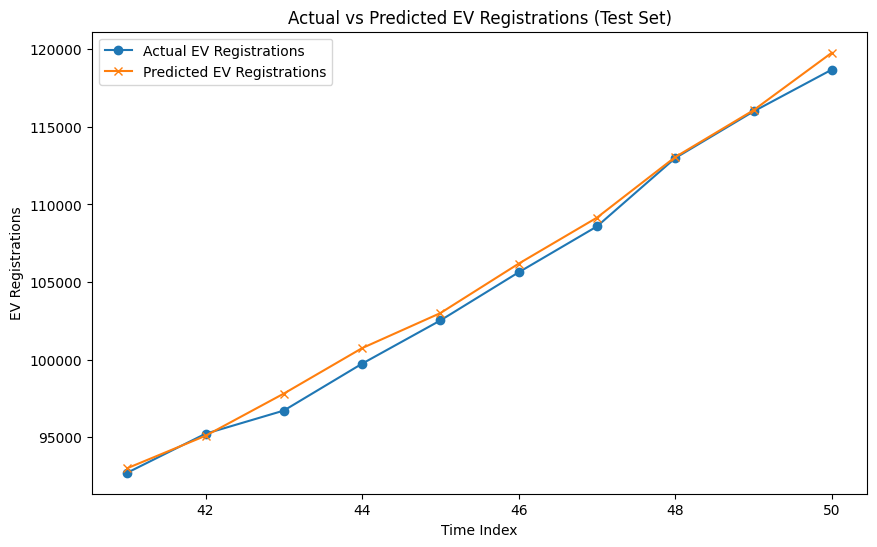

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def regression_analysis():
    # Load and clean the data
    ev_df = pd.read_csv('ev_registration.csv')
    fuel_df = pd.read_csv('/content/Fuel_prices.csv')

    # Clean fuel prices data
    price_columns = ['Gasoline', 'Diesel', 'CNG']
    for col in price_columns:
        if col in fuel_df.columns:
            fuel_df[col] = fuel_df[col].str.replace('$', '').astype(float)

    # Aggregate monthly EV registrations
    ev_df['Count'] = ev_df['Count'].astype(str).str.replace(',', '').astype(int)
    monthly_ev = ev_df.groupby('Year_Month')['Count'].sum().reset_index()

    # Convert dates to datetime
    fuel_df['Report Date'] = pd.to_datetime(fuel_df['Report Date'])
    monthly_ev['Year_Month'] = pd.to_datetime(monthly_ev['Year_Month'])

    # Merge datasets
    merged_df = pd.merge_asof(monthly_ev.sort_values('Year_Month'),
                             fuel_df.sort_values('Report Date'),
                             left_on='Year_Month',
                             right_on='Report Date')

    # Add lagged features and rolling averages
    merged_df['EV_Count_Lag1'] = merged_df['Count'].shift(1)  # 1-month lag
    merged_df['EV_Count_Rolling3'] = merged_df['Count'].rolling(window=3).mean()  # 3-month rolling avg
    merged_df = merged_df.dropna()  # Drop rows with NaN due to lag/rolling

    # Prepare features and target
    X = merged_df[['Gasoline', 'Diesel', 'CNG', 'EV_Count_Lag1', 'EV_Count_Rolling3']]
    y = merged_df['Count']

    # Time-based train-test split
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Ridge Regression
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("\nRidge Regression Results:")
    print(f"R-squared (Train): {model.score(X_train, y_train):.4f}")
    print(f"R-squared (Test): {model.score(X_test, y_test):.4f}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual EV Registrations', marker='o')
    plt.plot(y_test.index, y_pred, label='Predicted EV Registrations', marker='x')
    plt.xlabel('Time Index')
    plt.ylabel('EV Registrations')
    plt.title('Actual vs Predicted EV Registrations (Test Set)')
    plt.legend()
    plt.show()

# Run the analysis
regression_analysis()


<ipython-input-16-b5846d4dc9ba>:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fuel_df['Report Date'] = pd.to_datetime(fuel_df['Report Date'])
<ipython-input-16-b5846d4dc9ba>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_ev['Year_Month'] = pd.to_datetime(monthly_ev['Year_Month'])



Multiple Linear Regression Results:
R-squared (Train): 0.9997
R-squared (Test): 0.9924
Test RMSE: 747.91


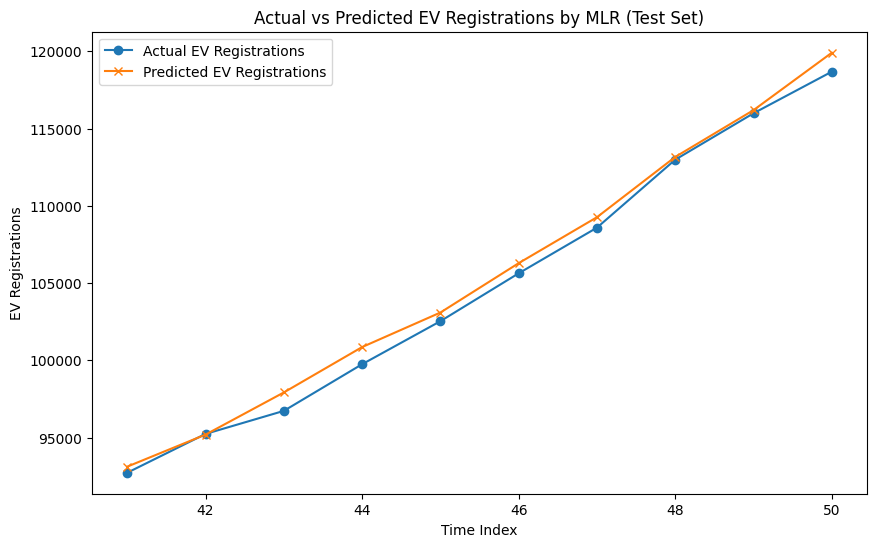

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def multiple_regression_analysis():
    # Load and clean the data
    ev_df = pd.read_csv('ev_registration.csv')
    fuel_df = pd.read_csv('/content/Fuel_prices.csv')

    # Clean fuel prices data
    price_columns = ['Gasoline', 'Diesel', 'CNG']
    for col in price_columns:
        if col in fuel_df.columns:
            fuel_df[col] = fuel_df[col].str.replace('$', '').astype(float)

    # Aggregate monthly EV registrations
    ev_df['Count'] = ev_df['Count'].astype(str).str.replace(',', '').astype(int)
    monthly_ev = ev_df.groupby('Year_Month')['Count'].sum().reset_index()

    # Convert dates to datetime
    fuel_df['Report Date'] = pd.to_datetime(fuel_df['Report Date'])
    monthly_ev['Year_Month'] = pd.to_datetime(monthly_ev['Year_Month'])

    # Merge datasets
    merged_df = pd.merge_asof(monthly_ev.sort_values('Year_Month'),
                             fuel_df.sort_values('Report Date'),
                             left_on='Year_Month',
                             right_on='Report Date')

    # Add lagged features and rolling averages
    merged_df['EV_Count_Lag1'] = merged_df['Count'].shift(1)  # 1-month lag
    merged_df['EV_Count_Rolling3'] = merged_df['Count'].rolling(window=3).mean()  # 3-month rolling average
    merged_df = merged_df.dropna()  # Drop rows with NaN due to lag/rolling

    # Prepare features and target
    X = merged_df[['Gasoline', 'Diesel', 'CNG', 'EV_Count_Lag1', 'EV_Count_Rolling3']]
    y = merged_df['Count']

    # Time-based train-test split
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Multiple Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("\nMultiple Linear Regression Results:")
    print(f"R-squared (Train): {model.score(X_train, y_train):.4f}")
    print(f"R-squared (Test): {model.score(X_test, y_test):.4f}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual EV Registrations', marker='o')
    plt.plot(y_test.index, y_pred, label='Predicted EV Registrations', marker='x')
    plt.xlabel('Time Index')
    plt.ylabel('EV Registrations')
    plt.title('Actual vs Predicted EV Registrations by MLR (Test Set)')
    plt.legend()
    plt.show()

# Run the analysis
multiple_regression_analysis()


<ipython-input-1-bc65cb39a4ff>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fuel_df['Report Date'] = pd.to_datetime(fuel_df['Report Date'])
<ipython-input-1-bc65cb39a4ff>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_ev['Year_Month'] = pd.to_datetime(monthly_ev['Year_Month'])
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147818.5484295856, tolerance: 27629.191493333336
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not


Lasso Regression Results:
Optimal alpha (Lasso): 1.0
R-squared (Train - Lasso): 0.9997
R-squared (Test - Lasso): 0.9930
Test RMSE (Lasso): 718.17

ElasticNet Regression Results:
Optimal alpha (ElasticNet): 1.0
Optimal l1 ratio (ElasticNet): 0.5
R-squared (Train - ElasticNet): 0.9997
R-squared (Test - ElasticNet): 0.9940
Test RMSE (ElasticNet): 664.95


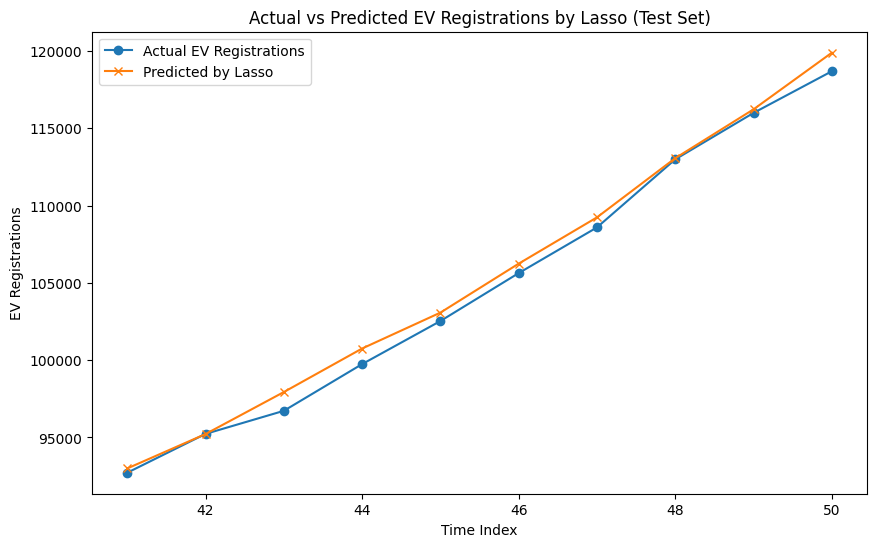

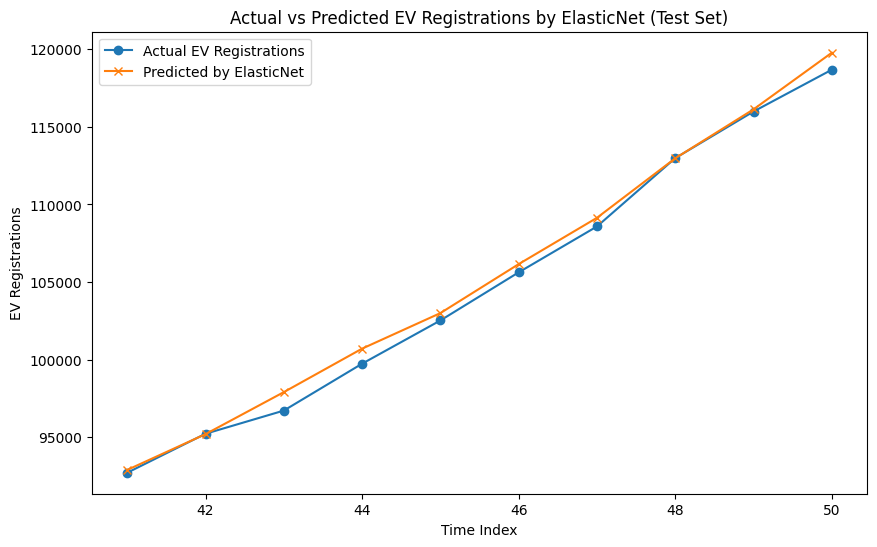

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

def regression_analysis():
    # Load and clean the data
    ev_df = pd.read_csv('ev_registration.csv')
    fuel_df = pd.read_csv('/content/Fuel_prices.csv')

    # Clean fuel prices data
    price_columns = ['Gasoline', 'Diesel', 'CNG']
    for col in price_columns:
        if col in fuel_df.columns:
            fuel_df[col] = fuel_df[col].str.replace('$', '').astype(float)

    # Aggregate monthly EV registrations
    ev_df['Count'] = ev_df['Count'].astype(str).str.replace(',', '').astype(int)
    monthly_ev = ev_df.groupby('Year_Month')['Count'].sum().reset_index()

    # Convert dates to datetime
    fuel_df['Report Date'] = pd.to_datetime(fuel_df['Report Date'])
    monthly_ev['Year_Month'] = pd.to_datetime(monthly_ev['Year_Month'])

    # Merge datasets
    merged_df = pd.merge_asof(monthly_ev.sort_values('Year_Month'),
                              fuel_df.sort_values('Report Date'),
                              left_on='Year_Month',
                              right_on='Report Date')

    # Add lagged features and rolling averages
    merged_df['EV_Count_Lag1'] = merged_df['Count'].shift(1)  # 1-month lag
    merged_df['EV_Count_Rolling3'] = merged_df['Count'].rolling(window=3).mean()  # 3-month rolling average
    merged_df = merged_df.dropna()  # Drop rows with NaN values due to lag/rolling

    # Prepare features and target
    X = merged_df[['Gasoline', 'Diesel', 'CNG', 'EV_Count_Lag1', 'EV_Count_Rolling3']]
    y = merged_df['Count']

    # Time-based train-test split
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Define cross-validation strategy
    tscv = TimeSeriesSplit(n_splits=5)

    # Lasso Regression with Cross-Validation
    lasso_alphas = np.logspace(-4, 0, 10)  # Typically smaller values for Lasso
    lasso_model = LassoCV(alphas=lasso_alphas, cv=tscv, max_iter=10000)
    lasso_model.fit(X_train, y_train)

    # ElasticNet Regression with Cross-Validation
    elasticnet_alphas = np.logspace(-4, 0, 10)  # Range of alphas
    elasticnet_ratios = np.linspace(0.1, 0.9, 5)  # Range of l1 ratios
    elasticnet_model = ElasticNetCV(alphas=elasticnet_alphas, l1_ratio=elasticnet_ratios, cv=tscv, max_iter=10000)
    elasticnet_model.fit(X_train, y_train)

    # Predictions and evaluation
    lasso_y_pred = lasso_model.predict(X_test)
    elasticnet_y_pred = elasticnet_model.predict(X_test)

    print("\nLasso Regression Results:")
    print(f"Optimal alpha (Lasso): {lasso_model.alpha_}")
    print(f"R-squared (Train - Lasso): {lasso_model.score(X_train, y_train):.4f}")
    print(f"R-squared (Test - Lasso): {lasso_model.score(X_test, y_test):.4f}")
    print(f"Test RMSE (Lasso): {np.sqrt(mean_squared_error(y_test, lasso_y_pred)):.2f}")

    print("\nElasticNet Regression Results:")
    print(f"Optimal alpha (ElasticNet): {elasticnet_model.alpha_}")
    print(f"Optimal l1 ratio (ElasticNet): {elasticnet_model.l1_ratio_}")
    print(f"R-squared (Train - ElasticNet): {elasticnet_model.score(X_train, y_train):.4f}")
    print(f"R-squared (Test - ElasticNet): {elasticnet_model.score(X_test, y_test):.4f}")
    print(f"Test RMSE (ElasticNet): {np.sqrt(mean_squared_error(y_test, elasticnet_y_pred)):.2f}")

    # Plot actual vs predicted for Lasso
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual EV Registrations', marker='o')
    plt.plot(y_test.index, lasso_y_pred, label='Predicted by Lasso', marker='x')
    plt.xlabel('Time Index')
    plt.ylabel('EV Registrations')
    plt.title('Actual vs Predicted EV Registrations by Lasso (Test Set)')
    plt.legend()
    plt.show()

    # Plot actual vs predicted for ElasticNet
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual EV Registrations', marker='o')
    plt.plot(y_test.index, elasticnet_y_pred, label='Predicted by ElasticNet', marker='x')
    plt.xlabel('Time Index')
    plt.ylabel('EV Registrations')
    plt.title('Actual vs Predicted EV Registrations by ElasticNet (Test Set)')
    plt.legend()
    plt.show()

# Run the analysis
regression_analysis()


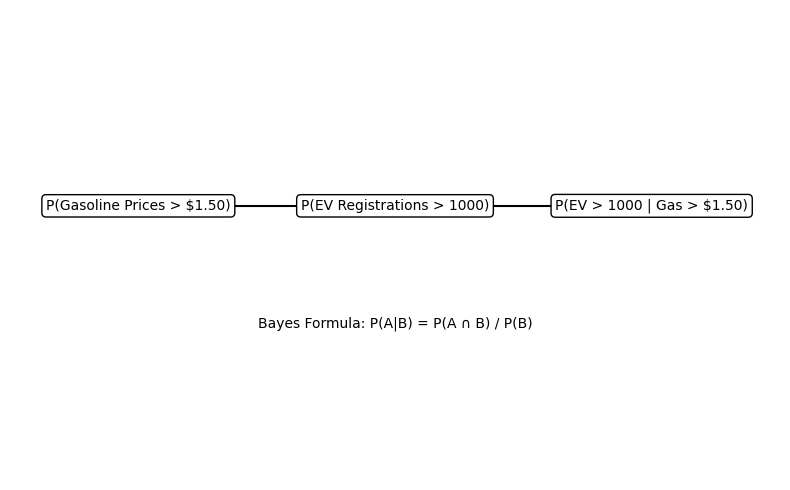

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure with extra space around the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Define box properties
box_props = dict(boxstyle="round", edgecolor="black", facecolor="white")

# Draw the first probability box with extra space from the left
ax.text(0.1, 0.7, 'P(Gasoline Prices > $1.50)', bbox=box_props, ha='center', va='center', fontsize=10)

# Draw the second probability box with extra space from the left
ax.text(0.5, 0.7, 'P(EV Registrations > 1000)', bbox=box_props, ha='center', va='center', fontsize=10)

# Draw the conditional probability box with extra space from the left
ax.text(0.9, 0.7, 'P(EV > 1000 | Gas > $1.50)', bbox=box_props, ha='center', va='center', fontsize=10)

# Use lines (instead of arrows) with some space between the boxes
ax.plot([0.2, 0.35], [0.7, 0.7], color='black', lw=1.5)  # Line between first and second box
ax.plot([0.6, 0.75], [0.7, 0.7], color='black', lw=1.5)  # Line between second and third box

# Add a label for the probability calculation, positioned lower to avoid collision
ax.text(0.5, 0.4, 'Bayes Formula: P(A|B) = P(A ∩ B) / P(B)', ha='center', va='center', fontsize=10, color='black')

# Adjust plot limits for better spacing around the diagram
ax.set_xlim(-0.1, 1.1)  # Increase right space
ax.set_ylim(0, 1.2)     # Increase top space

# Remove axes for simplicity
ax.axis('off')

# Display the diagram
plt.tight_layout()
plt.show()
